# <b>CS156 (Introduction to AI), Fall 2022</b>
# <u><b>Homework 9 submission</b></u>

### Roster Name: Preet LNU
### Student ID: 014755741
### Email address: preet.lnu@sjsu.edu


##  <u>References and sources </u>

Autoencoders.MNIST.ipynb

##  <u>Solution</u>

#### Load libraries and set random number generator seed

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

from tensorflow.keras import layers
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model

import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)

#### Code the solution

#### Loading and preparing image data

In [3]:
(x_train_valid, y_train_valid), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

x_train, x_validation, y_train, y_validation = train_test_split(x_train_valid, y_train_valid, test_size=0.2, random_state=0)

x_train = x_train.astype("float32") / 255
x_validation = x_validation.astype("float32") / 255
x_test = x_test.astype("float32") / 255

x_train.shape, x_validation.shape, x_test.shape

4422102/4422102 [==============================] - 0s 0us/step


((48000, 28, 28), (12000, 28, 28), (10000, 28, 28))

#### Autoencoder model and its performance for first 10 images in test set

In [4]:
x_train = x_train.reshape(-1, 784)
x_validation = x_validation.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

x_train.shape, x_validation.shape, x_test.shape

((48000, 784), (12000, 784), (10000, 784))

In [5]:
input_layer = Input(shape=(784,)) 
encoded = layers.Dense(128, activation='relu')(input_layer)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)

decoded = layers.Dense(64, activation='sigmoid')(encoded)
decoded = layers.Dense(128, activation='sigmoid')(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)

autoencoder = keras.Model(input_layer, decoded)
autoencoder.summary()

encoder = keras.Model(input_layer, encoded)

encoded_input = keras.Input(shape=(128,))
decoder_layer = autoencoder.layers[-1]  
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 784)               101136

#### Fitting/training the model

In [6]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=30,
                batch_size=2048,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/30
24/24 [==============================] - 7s 217ms/step - loss: 0.5887 - val_loss: 0.5139
Epoch 2/30
24/24 [==============================] - 5s 204ms/step - loss: 0.4990 - val_loss: 0.4920
Epoch 3/30
24/24 [==============================] - 5s 200ms/step - loss: 0.4873 - val_loss: 0.4830
Epoch 4/30
24/24 [==============================] - 4s 160ms/step - loss: 0.4742 - val_loss: 0.4635
Epoch 5/30
24/24 [==============================] - 3s 107ms/step - loss: 0.4514 - val_loss: 0.4417
Epoch 6/30
24/24 [==============================] - 2s 104ms/step - loss: 0.4331 - val_loss: 0.4261
Epoch 7/30
24/24 [==============================] - 3s 108ms/step - loss: 0.4181 - val_loss: 0.4112
Epoch 8/30
24/24 [==============================] - 2s 102ms/step - loss: 0.4037 - val_loss: 0.3993
Epoch 9/30
24/24 [==============================] - 2s 104ms/step - loss: 0.3967 - val_loss: 0.3937
Epoch 10/30
24/24 [==============================] - 2s 102ms/step - loss: 0.3899 - val_loss: 0.3884

#### Plotting the reconstructed images

313/313 [==============================] - 1s 2ms/step


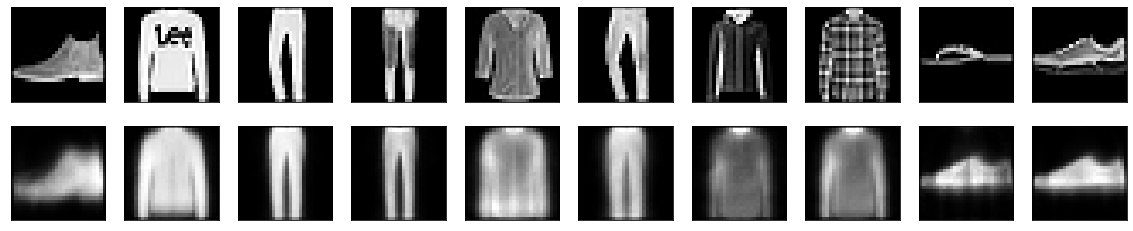

In [7]:
predictions = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(predictions[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

#### Reshaping and denoising images with an autoencoder model + plotting

In [8]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_validation = x_validation.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

x_train.shape, x_validation.shape, x_test.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (10000, 28, 28, 1))

In [9]:
noise_factor = 0.4
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_validation_noisy = x_validation + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_validation.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_validation_noisy = np.clip(x_validation_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

#### Plotting noised images

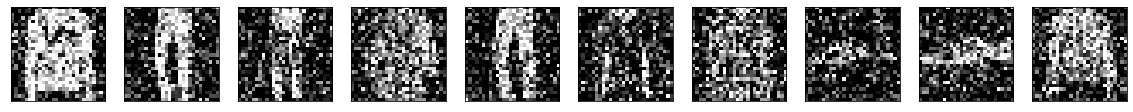

In [10]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [11]:
input_layer = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_layer)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)


x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_layer, decoded)
autoencoder.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 32)          9248

#### Training the noise model and plotting

In [12]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train_noisy, x_train,
                epochs=30,
                batch_size=2048,
                shuffle=True,
                validation_data=(x_validation_noisy, x_validation))

Epoch 1/30
24/24 [==============================] - 142s 6s/step - loss: 0.5317 - val_loss: 0.3797
Epoch 2/30
24/24 [==============================] - 129s 5s/step - loss: 0.3526 - val_loss: 0.3345
Epoch 3/30
24/24 [==============================] - 130s 5s/step - loss: 0.3277 - val_loss: 0.3213
Epoch 4/30
24/24 [==============================] - 128s 5s/step - loss: 0.3186 - val_loss: 0.3157
Epoch 5/30
24/24 [==============================] - 130s 5s/step - loss: 0.3137 - val_loss: 0.3116
Epoch 6/30
24/24 [==============================] - 128s 5s/step - loss: 0.3104 - val_loss: 0.3088
Epoch 7/30
24/24 [==============================] - 130s 5s/step - loss: 0.3080 - val_loss: 0.3069
Epoch 8/30
24/24 [==============================] - 129s 5s/step - loss: 0.3062 - val_loss: 0.3050
Epoch 9/30
24/24 [==============================] - 128s 5s/step - loss: 0.3047 - val_loss: 0.3040
Epoch 10/30
24/24 [==============================] - 130s 5s/step - loss: 0.3034 - val_loss: 0.3025
Epoch 11/

#### Plotting the reconstructed images

313/313 [==============================] - 7s 21ms/step


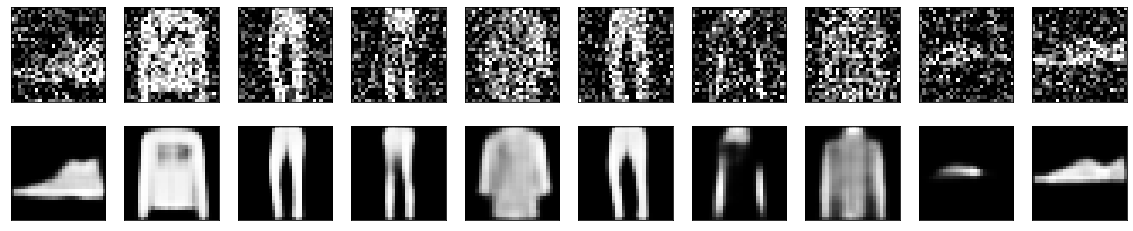

In [13]:
predictions = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):

    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(predictions[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
